In [1]:
import os 

os.getcwd()

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification'

In [2]:
image_path = os.getcwd() + "\\data\\"
image_path

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data\\'

In [3]:
import cv2 
cv2.imread(image_path+"\\dog\\images.jpg")

array([[[ 62,  97, 111],
        [ 60,  95, 108],
        [ 59,  91, 104],
        ...,
        [ 96, 146, 168],
        [ 96, 143, 164],
        [ 93, 138, 159]],

       [[ 63,  98, 112],
        [ 60,  95, 109],
        [ 58,  90, 103],
        ...,
        [ 99, 149, 171],
        [ 97, 144, 165],
        [ 94, 139, 160]],

       [[ 65,  99, 115],
        [ 61,  96, 110],
        [ 56,  88, 101],
        ...,
        [104, 154, 176],
        [ 99, 146, 167],
        [ 96, 141, 162]],

       ...,

       [[ 78,  97, 104],
        [ 60,  79,  86],
        [ 44,  64,  69],
        ...,
        [ 43,  94, 104],
        [ 41,  89,  95],
        [ 41,  89,  93]],

       [[ 87, 109, 115],
        [ 66,  88,  94],
        [ 50,  69,  76],
        ...,
        [ 43,  92, 100],
        [ 42,  90,  96],
        [ 43,  90,  94]],

       [[ 93, 115, 121],
        [ 71,  93,  99],
        [ 53,  72,  79],
        ...,
        [ 43,  93,  99],
        [ 44,  90,  97],
        [ 44,  91,  95]]

In [ ]:
data_dir = os.path.join(os.getcwd(), "data")
data_dir

'd:\\MachineLearning_Foundation\\Machine Learning\\ImageClassification\\data'

In [14]:
data = []
labels = []

for i in os.listdir(data_dir):
   #print(i) # --> cat dog 
    for class_name in os.listdir(os.path.join(data_dir,i)):
        class_path = os.path.join(data_dir,i,class_name)
        #print(class_path)
        data.append(class_path)
        labels.append(i)

In [22]:
test_image = data[1]
print(test_image)
test_image = cv2.imread(test_image)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
print(test_image.shape)


d:\MachineLearning_Foundation\Machine Learning\ImageClassification\data\cat\download (2).jpg
(225, 225, 3)


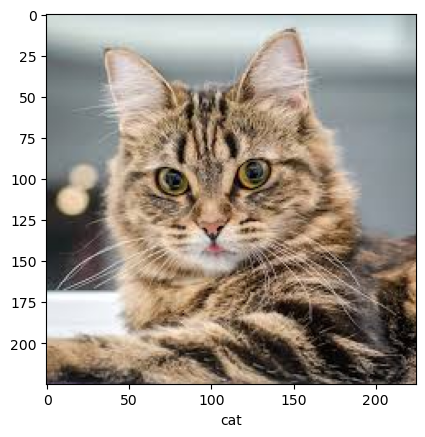

In [23]:
import numpy as np
import matplotlib.pyplot as plt 

test_label = labels[1]
plt.imshow(test_image)
plt.xlabel(test_label)
plt.show()

In [31]:
preprocessing_image = []
for read_image in data:
    form_image = cv2.imread(read_image)
    form_image = cv2.resize(form_image, (64,64))
    form_image = np.array(form_image)
    print(form_image.shape)
    preprocessing_image.append(form_image)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


In [32]:
preprocessing_image

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [73]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
labels_int   = le.fit_transform(labels)      
labels_onehot = to_categorical(labels_int)    
labels_onehot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [74]:
from sklearn.model_selection import train_test_split 

x_train,x_test, y_train,y_test = train_test_split(preprocessing_image, labels_onehot,test_size=0.2, shuffle=True)


In [75]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14, 64, 64, 3)
(14, 2)
(4, 64, 64, 3)
(4, 2)


In [76]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

input_shape = (64, 64, 3)
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(2, activation='softmax')
])
model.summary()

d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │        36,866 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,114 (508.26 KB)

 Trainable params: 130,114 (508.26 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
(3 * 3 * 3  +  1)  * 32

896

In [78]:
(3 * 3 * 32 + 1) * 64

18496

In [79]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = "categorical_crossentropy", optimizer = Adam(), metrics = ["accuracy"])

In [80]:
history = model.fit(x = x_train, y = y_train, epochs=100 , validation_data=[x_test, y_test], batch_size=12)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 366ms/step - accuracy: 0.6508 - loss: 22.7773 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3968 - loss: 96.3883 - val_accuracy: 0.0000e+00 - val_loss: 57.0410
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5476 - loss: 24.8778 - val_accuracy: 0.0000e+00 - val_loss: 33.9244
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5754 - loss: 11.3772 - val_accuracy: 1.0000 - val_loss: 0.2432
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8016 - loss: 1.1395 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6230 - loss: 1.1116 - val_accuracy: 0.0000e+00 - val_loss: 8.3083
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7540 - loss: 0.8569 - val_accuracy: 0.5000 - val_loss: 0.3960
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9524 - loss: 0.2223 - val_accu

In [93]:
eval_loss , eval_acc = model.evaluate(x_test, y_test)
eval_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 2.0416


0.75

In [94]:
eval_loss

2.041642427444458